In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

cust_df=  pd.read_csv('./train_santander.csv', encoding= 'latin-1')
print('dataset shape : ', cust_df.shape)
cust_df.head(3)

dataset shape :  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [20]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [21]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


해당 데이터를 불러와 어떻게 생겼는지 확인 한 후, info()를 통해서 null값이 있는지, 각 피처의 데이터 타입은 어떻게 되어있는지 확인한다. 


또한, 불만족인 고객은 'TARGET' 피처가 1, 그렇지 않은 고객은 0이다. 

이것을 통해서 'TARGET'피처의, 값들이 어떻게 분포를 하고 있는지 확인한다. 

확인해보니, 불만족인 고객이 4%로 반대 라벨보다 훨씬 적은 것을 확인할 수 있다. 

In [22]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


describe() 매서드를 이용해서 각 피처의 값 분포에 대해서 알아보니, 

var3 칼럼의 경우 min값이 -99999999인 것을 볼 수 있다. 이것은 실제 측정 값이 아니라, NaN이나 특정 예외 값을 해당 값으로 변환한 것이다. 


다른 값이 대부분 2인 것에 반해서 해당 숫자의 편차가 너무 크므로, 학습시에 방해가 된다. 

따라서 -99999999의 값을 가장 많은 값인 2로 바꾸고, 

id 피처는 피처를 드롭한다.

In [23]:
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)

#피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리 
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape : {0}'.format(X_features.shape))

피처 데이터 shape : (76020, 369)


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape : {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape : (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#n_estimators는 500으로, random_state는 예제 수행 시마다 동일 예측 결과를 위해 설정 
xgb_clf = XGBClassifier(n_estimators = 500, random_state = 156)

#성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, 
           eval_metric="auc", eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC_AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [26]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소 
xgb_clf = XGBClassifier(n_estimators = 100)

params = {'max_depth' : [5,7], 'min_child_weight' : [1,3], 'colsample_bytree' : [0.5,0.75]}

#cv는 3으로 결정 
gridcv = GridSearchCV(xgb_clf, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = "auc", eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 : ', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC_AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802656	validation_1-auc:0.807919
[2]	validation_0-auc:0.80013	validation_1-auc:0.804948
[3]	validation_0-auc:0.805843	validation_1-auc:0.809844
[4]	validation_0-auc:0.814728	validation_1-auc:0.817554
[5]	validation_0-auc:0.80989	validation_1-auc:0.812919
[6]	validation_0-auc:0.80994	validation_1-auc:0.813688
[7]	validation_0-auc:0.818246	validation_1-auc:0.820487
[8]	validation_0-auc:0.821681	validation_1-auc:0.823214
[9]	validation_0-auc:0.819933	validation_1-auc:0.821108
[10]	validation_0-auc:0.825898	validation_1-auc:0.825134
[11]	validation_0-auc:0.829776	validation_1-auc:0.827521
[12]	validation_0-auc:0.832087	validation_1-auc:0.828878
[13]	validation_0-auc:0.83185	validation_1-auc:0.827989
[14]	validation_0-auc:0.830253	validation_1-auc:0.826429
[1

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.717372	validation_1-auc:0.725803
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.811453	validation_1-auc:0.811759
[2]	validation_0-auc:0.804735	validation_1-auc:0.808587
[3]	validation_0-auc:0.814898	validation_1-auc:0.814414
[4]	validation_0-auc:0.823423	validation_1-auc:0.822485
[5]	validation_0-auc:0.817417	validation_1-auc:0.817277
[6]	validation_0-auc:0.816492	validation_1-auc:0.816198
[7]	validation_0-auc:0.823936	validation_1-auc:0.820988
[8]	validation_0-auc:0.827756	validation_1-auc:0.82517
[9]	validation_0-auc:0.828462	validation_1-auc:0.827085
[10]	validation_0-auc:0.831469	validation_1-auc:0.828213
[11]	validation_0-auc:0.834412	validation_1-auc:0.830737
[12]	validation_0-auc:0.836393	validation_1-auc:0.832236
[13]	validation_0-auc:0.835472	validation_1-auc:0.831531
[14]	validation_0-auc:0.835833	validation_1-auc:0.830984

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.728604	validation_1-auc:0.729138
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.815073	validation_1-auc:0.81486
[2]	validation_0-auc:0.807764	validation_1-auc:0.806299
[3]	validation_0-auc:0.821197	validation_1-auc:0.820956
[4]	validation_0-auc:0.826503	validation_1-auc:0.824373
[5]	validation_0-auc:0.824434	validation_1-auc:0.821276
[6]	validation_0-auc:0.820665	validation_1-auc:0.815827
[7]	validation_0-auc:0.828395	validation_1-auc:0.826386
[8]	validation_0-auc:0.832078	validation_1-auc:0.828844
[9]	validation_0-auc:0.831194	validation_1-auc:0.828563
[10]	validation_0-auc:0.833759	validation_1-auc:0.82963
[11]	validation_0-auc:0.836244	validation_1-auc:0.832161
[12]	validation_0-auc:0.837833	validation_1-auc:0.832555
[13]	validation_0-auc:0.838108	validation_1-auc:0.832119
[14]	validation_0-auc:0.837637	validation_1-auc:0.830707


C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.714006	validation_1-auc:0.723827
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.804177	validation_1-auc:0.810124
[2]	validation_0-auc:0.797681	validation_1-auc:0.806193
[3]	validation_0-auc:0.805563	validation_1-auc:0.8132
[4]	validation_0-auc:0.816182	validation_1-auc:0.818554
[5]	validation_0-auc:0.811689	validation_1-auc:0.81533
[6]	validation_0-auc:0.811593	validation_1-auc:0.815446
[7]	validation_0-auc:0.819138	validation_1-auc:0.821911
[8]	validation_0-auc:0.822456	validation_1-auc:0.825036
[9]	validation_0-auc:0.822175	validation_1-auc:0.824127
[10]	validation_0-auc:0.826339	validation_1-auc:0.827481
[11]	validation_0-auc:0.830609	validation_1-auc:0.830145
[12]	validation_0-auc:0.832194	validation_1-auc:0.830867
[13]	validation_0-auc:0.832881	validation_1-auc:0.830585
[14]	validation_0-auc:0.83105	validation_1-auc:0.829088
[1

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.717533	validation_1-auc:0.726673
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.809734	validation_1-auc:0.81389
[2]	validation_0-auc:0.804202	validation_1-auc:0.809256
[3]	validation_0-auc:0.812949	validation_1-auc:0.814788
[4]	validation_0-auc:0.823785	validation_1-auc:0.82346
[5]	validation_0-auc:0.818969	validation_1-auc:0.820914
[6]	validation_0-auc:0.819058	validation_1-auc:0.821506
[7]	validation_0-auc:0.826851	validation_1-auc:0.82669
[8]	validation_0-auc:0.830179	validation_1-auc:0.828637
[9]	validation_0-auc:0.829568	validation_1-auc:0.828939
[10]	validation_0-auc:0.832504	validation_1-auc:0.829919
[11]	validation_0-auc:0.835181	validation_1-auc:0.832471
[12]	validation_0-auc:0.837596	validation_1-auc:0.833411
[13]	validation_0-auc:0.836468	validation_1-auc:0.8328
[14]	validation_0-auc:0.835572	validation_1-auc:0.830916
[15

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.733623	validation_1-auc:0.734145
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.814232	validation_1-auc:0.811655
[2]	validation_0-auc:0.805433	validation_1-auc:0.803959
[3]	validation_0-auc:0.820416	validation_1-auc:0.819184
[4]	validation_0-auc:0.826708	validation_1-auc:0.824223
[5]	validation_0-auc:0.824914	validation_1-auc:0.822627
[6]	validation_0-auc:0.820232	validation_1-auc:0.816653
[7]	validation_0-auc:0.828122	validation_1-auc:0.826539
[8]	validation_0-auc:0.831957	validation_1-auc:0.827747
[9]	validation_0-auc:0.830333	validation_1-auc:0.827465
[10]	validation_0-auc:0.833473	validation_1-auc:0.828121
[11]	validation_0-auc:0.836154	validation_1-auc:0.83083
[12]	validation_0-auc:0.838005	validation_1-auc:0.831142
[13]	validation_0-auc:0.838252	validation_1-auc:0.830971
[14]	validation_0-auc:0.837533	validation_1-auc:0.830021

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.721496	validation_1-auc:0.726707
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.809727	validation_1-auc:0.80884
[2]	validation_0-auc:0.804309	validation_1-auc:0.807395
[3]	validation_0-auc:0.815093	validation_1-auc:0.816945
[4]	validation_0-auc:0.8242	validation_1-auc:0.82348
[5]	validation_0-auc:0.819516	validation_1-auc:0.819507
[6]	validation_0-auc:0.819212	validation_1-auc:0.818854
[7]	validation_0-auc:0.827414	validation_1-auc:0.826411
[8]	validation_0-auc:0.831965	validation_1-auc:0.829566
[9]	validation_0-auc:0.832264	validation_1-auc:0.827283
[10]	validation_0-auc:0.836521	validation_1-auc:0.829756
[11]	validation_0-auc:0.841098	validation_1-auc:0.831416
[12]	validation_0-auc:0.843738	validation_1-auc:0.83204
[13]	validation_0-auc:0.843719	validation_1-auc:0.832153
[14]	validation_0-auc:0.843353	validation_1-auc:0.830469
[15

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.721845	validation_1-auc:0.729773
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.825015	validation_1-auc:0.81891
[2]	validation_0-auc:0.811637	validation_1-auc:0.807714
[3]	validation_0-auc:0.823134	validation_1-auc:0.817803
[4]	validation_0-auc:0.833902	validation_1-auc:0.827267
[5]	validation_0-auc:0.829359	validation_1-auc:0.823344
[6]	validation_0-auc:0.830639	validation_1-auc:0.823274
[7]	validation_0-auc:0.837037	validation_1-auc:0.828343
[8]	validation_0-auc:0.841772	validation_1-auc:0.831877
[9]	validation_0-auc:0.841507	validation_1-auc:0.830342
[10]	validation_0-auc:0.845543	validation_1-auc:0.832091
[11]	validation_0-auc:0.848388	validation_1-auc:0.833807
[12]	validation_0-auc:0.850064	validation_1-auc:0.835155
[13]	validation_0-auc:0.85001	validation_1-auc:0.83485
[14]	validation_0-auc:0.84984	validation_1-auc:0.834875
[1

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.736837	validation_1-auc:0.734096
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822074	validation_1-auc:0.815712
[2]	validation_0-auc:0.814373	validation_1-auc:0.806888
[3]	validation_0-auc:0.828324	validation_1-auc:0.821214
[4]	validation_0-auc:0.832905	validation_1-auc:0.825577
[5]	validation_0-auc:0.82953	validation_1-auc:0.822776
[6]	validation_0-auc:0.830211	validation_1-auc:0.822255
[7]	validation_0-auc:0.833664	validation_1-auc:0.825988
[8]	validation_0-auc:0.839	validation_1-auc:0.82913
[9]	validation_0-auc:0.838751	validation_1-auc:0.828431
[10]	validation_0-auc:0.843419	validation_1-auc:0.830844
[11]	validation_0-auc:0.845813	validation_1-auc:0.833661
[12]	validation_0-auc:0.847898	validation_1-auc:0.835004
[13]	validation_0-auc:0.848932	validation_1-auc:0.834419
[14]	validation_0-auc:0.849368	validation_1-auc:0.833846
[15

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.717208	validation_1-auc:0.727812
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.809573	validation_1-auc:0.813331
[2]	validation_0-auc:0.80395	validation_1-auc:0.809303
[3]	validation_0-auc:0.816248	validation_1-auc:0.820938
[4]	validation_0-auc:0.824753	validation_1-auc:0.825794
[5]	validation_0-auc:0.821994	validation_1-auc:0.823793
[6]	validation_0-auc:0.822976	validation_1-auc:0.824266
[7]	validation_0-auc:0.82934	validation_1-auc:0.829688
[8]	validation_0-auc:0.833576	validation_1-auc:0.832642
[9]	validation_0-auc:0.834068	validation_1-auc:0.830283
[10]	validation_0-auc:0.838247	validation_1-auc:0.832031
[11]	validation_0-auc:0.841382	validation_1-auc:0.834056
[12]	validation_0-auc:0.843892	validation_1-auc:0.835138
[13]	validation_0-auc:0.843954	validation_1-auc:0.833652
[14]	validation_0-auc:0.843398	validation_1-auc:0.831399


C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.721794	validation_1-auc:0.729972
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81618	validation_1-auc:0.815586
[2]	validation_0-auc:0.810597	validation_1-auc:0.8122
[3]	validation_0-auc:0.824888	validation_1-auc:0.823809
[4]	validation_0-auc:0.834641	validation_1-auc:0.829674
[5]	validation_0-auc:0.832179	validation_1-auc:0.829251
[6]	validation_0-auc:0.831195	validation_1-auc:0.828099
[7]	validation_0-auc:0.837771	validation_1-auc:0.832911
[8]	validation_0-auc:0.841742	validation_1-auc:0.835194
[9]	validation_0-auc:0.842543	validation_1-auc:0.834109
[10]	validation_0-auc:0.845366	validation_1-auc:0.835114
[11]	validation_0-auc:0.847758	validation_1-auc:0.835784
[12]	validation_0-auc:0.849917	validation_1-auc:0.836811
[13]	validation_0-auc:0.850203	validation_1-auc:0.835643
[14]	validation_0-auc:0.849286	validation_1-auc:0.833685
[

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.740963	validation_1-auc:0.745305
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822887	validation_1-auc:0.821497
[2]	validation_0-auc:0.813789	validation_1-auc:0.809612
[3]	validation_0-auc:0.827305	validation_1-auc:0.821955
[4]	validation_0-auc:0.83233	validation_1-auc:0.826429
[5]	validation_0-auc:0.83172	validation_1-auc:0.822129
[6]	validation_0-auc:0.832023	validation_1-auc:0.820981
[7]	validation_0-auc:0.835138	validation_1-auc:0.824732
[8]	validation_0-auc:0.840103	validation_1-auc:0.827515
[9]	validation_0-auc:0.839281	validation_1-auc:0.825906
[10]	validation_0-auc:0.843592	validation_1-auc:0.828638
[11]	validation_0-auc:0.846217	validation_1-auc:0.833174
[12]	validation_0-auc:0.848386	validation_1-auc:0.834588
[13]	validation_0-auc:0.849496	validation_1-auc:0.833773
[14]	validation_0-auc:0.849095	validation_1-auc:0.833212


C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.806564	validation_1-auc:0.807879
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.813222	validation_1-auc:0.814069
[2]	validation_0-auc:0.824346	validation_1-auc:0.81954
[3]	validation_0-auc:0.823013	validation_1-auc:0.817793
[4]	validation_0-auc:0.82501	validation_1-auc:0.82085
[5]	validation_0-auc:0.827317	validation_1-auc:0.824114
[6]	validation_0-auc:0.828588	validation_1-auc:0.824279
[7]	validation_0-auc:0.83003	validation_1-auc:0.824394
[8]	validation_0-auc:0.830141	validation_1-auc:0.823415
[9]	validation_0-auc:0.831465	validation_1-auc:0.824209
[10]	validation_0-auc:0.832546	validation_1-auc:0.825038
[11]	validation_0-auc:0.832902	validation_1-auc:0.825393
[12]	validation_0-auc:0.833475	validation_1-auc:0.826162
[13]	validation_0-auc:0.835758	validation_1-auc:0.829582
[14]	validation_0-auc:0.837817	validation_1-auc:0.83159
[15

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.808752	validation_1-auc:0.799538
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.814155	validation_1-auc:0.808631
[2]	validation_0-auc:0.822097	validation_1-auc:0.818521
[3]	validation_0-auc:0.824996	validation_1-auc:0.821016
[4]	validation_0-auc:0.825963	validation_1-auc:0.822125
[5]	validation_0-auc:0.828318	validation_1-auc:0.821873
[6]	validation_0-auc:0.830602	validation_1-auc:0.821908
[7]	validation_0-auc:0.831274	validation_1-auc:0.822271
[8]	validation_0-auc:0.832728	validation_1-auc:0.823545
[9]	validation_0-auc:0.834143	validation_1-auc:0.824065
[10]	validation_0-auc:0.835163	validation_1-auc:0.825245
[11]	validation_0-auc:0.836769	validation_1-auc:0.827402
[12]	validation_0-auc:0.837065	validation_1-auc:0.827606
[13]	validation_0-auc:0.83888	validation_1-auc:0.830196
[14]	validation_0-auc:0.840119	validation_1-auc:0.830559

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.82027	validation_1-auc:0.818497
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.824986	validation_1-auc:0.821693
[2]	validation_0-auc:0.827619	validation_1-auc:0.823498
[3]	validation_0-auc:0.829496	validation_1-auc:0.826497
[4]	validation_0-auc:0.830271	validation_1-auc:0.827178
[5]	validation_0-auc:0.830396	validation_1-auc:0.828033
[6]	validation_0-auc:0.831138	validation_1-auc:0.828416
[7]	validation_0-auc:0.832001	validation_1-auc:0.830374
[8]	validation_0-auc:0.832173	validation_1-auc:0.830509
[9]	validation_0-auc:0.833419	validation_1-auc:0.830492
[10]	validation_0-auc:0.834465	validation_1-auc:0.830492
[11]	validation_0-auc:0.835371	validation_1-auc:0.830762
[12]	validation_0-auc:0.838084	validation_1-auc:0.830698
[13]	validation_0-auc:0.840093	validation_1-auc:0.832864
[14]	validation_0-auc:0.842599	validation_1-auc:0.834286

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.807908	validation_1-auc:0.80725
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.812758	validation_1-auc:0.813847
[2]	validation_0-auc:0.823388	validation_1-auc:0.820791
[3]	validation_0-auc:0.825595	validation_1-auc:0.824416
[4]	validation_0-auc:0.826144	validation_1-auc:0.824778
[5]	validation_0-auc:0.827835	validation_1-auc:0.824887
[6]	validation_0-auc:0.82898	validation_1-auc:0.825512
[7]	validation_0-auc:0.829906	validation_1-auc:0.825893
[8]	validation_0-auc:0.830393	validation_1-auc:0.82604
[9]	validation_0-auc:0.831299	validation_1-auc:0.826866
[10]	validation_0-auc:0.832295	validation_1-auc:0.826932
[11]	validation_0-auc:0.83449	validation_1-auc:0.828599
[12]	validation_0-auc:0.834629	validation_1-auc:0.828345
[13]	validation_0-auc:0.837725	validation_1-auc:0.8319
[14]	validation_0-auc:0.838097	validation_1-auc:0.831941
[15]

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.811089	validation_1-auc:0.810522
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.816145	validation_1-auc:0.80958
[2]	validation_0-auc:0.823006	validation_1-auc:0.815162
[3]	validation_0-auc:0.826799	validation_1-auc:0.820588
[4]	validation_0-auc:0.828171	validation_1-auc:0.822185
[5]	validation_0-auc:0.830317	validation_1-auc:0.821841
[6]	validation_0-auc:0.831526	validation_1-auc:0.82214
[7]	validation_0-auc:0.833025	validation_1-auc:0.823823
[8]	validation_0-auc:0.833822	validation_1-auc:0.824124
[9]	validation_0-auc:0.835479	validation_1-auc:0.825068
[10]	validation_0-auc:0.83707	validation_1-auc:0.82645
[11]	validation_0-auc:0.838077	validation_1-auc:0.828302
[12]	validation_0-auc:0.838651	validation_1-auc:0.828116
[13]	validation_0-auc:0.83997	validation_1-auc:0.831353
[14]	validation_0-auc:0.840415	validation_1-auc:0.831227
[15

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.81869	validation_1-auc:0.817015
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.824094	validation_1-auc:0.820241
[2]	validation_0-auc:0.826595	validation_1-auc:0.821724
[3]	validation_0-auc:0.829527	validation_1-auc:0.824427
[4]	validation_0-auc:0.829693	validation_1-auc:0.824851
[5]	validation_0-auc:0.831818	validation_1-auc:0.827222
[6]	validation_0-auc:0.834517	validation_1-auc:0.828952
[7]	validation_0-auc:0.8341	validation_1-auc:0.82885
[8]	validation_0-auc:0.834768	validation_1-auc:0.82877
[9]	validation_0-auc:0.836994	validation_1-auc:0.830518
[10]	validation_0-auc:0.837355	validation_1-auc:0.830412
[11]	validation_0-auc:0.838603	validation_1-auc:0.83147
[12]	validation_0-auc:0.839379	validation_1-auc:0.83173
[13]	validation_0-auc:0.84163	validation_1-auc:0.833085
[14]	validation_0-auc:0.842877	validation_1-auc:0.833829
[15]	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.817712	validation_1-auc:0.810588
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822973	validation_1-auc:0.818937
[2]	validation_0-auc:0.828214	validation_1-auc:0.822305
[3]	validation_0-auc:0.833547	validation_1-auc:0.828183
[4]	validation_0-auc:0.834204	validation_1-auc:0.827296
[5]	validation_0-auc:0.835055	validation_1-auc:0.828722
[6]	validation_0-auc:0.835412	validation_1-auc:0.827872
[7]	validation_0-auc:0.836887	validation_1-auc:0.828207
[8]	validation_0-auc:0.837771	validation_1-auc:0.82853
[9]	validation_0-auc:0.838834	validation_1-auc:0.829628
[10]	validation_0-auc:0.84078	validation_1-auc:0.830579
[11]	validation_0-auc:0.844138	validation_1-auc:0.832853
[12]	validation_0-auc:0.844703	validation_1-auc:0.83303
[13]	validation_0-auc:0.847231	validation_1-auc:0.834739
[14]	validation_0-auc:0.848425	validation_1-auc:0.834679
[

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.814009	validation_1-auc:0.804403
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.821275	validation_1-auc:0.813196
[2]	validation_0-auc:0.827903	validation_1-auc:0.820319
[3]	validation_0-auc:0.833379	validation_1-auc:0.827093
[4]	validation_0-auc:0.835471	validation_1-auc:0.826684
[5]	validation_0-auc:0.840934	validation_1-auc:0.831989
[6]	validation_0-auc:0.843255	validation_1-auc:0.831061
[7]	validation_0-auc:0.844488	validation_1-auc:0.82998
[8]	validation_0-auc:0.846061	validation_1-auc:0.830685
[9]	validation_0-auc:0.847914	validation_1-auc:0.830873
[10]	validation_0-auc:0.848697	validation_1-auc:0.831409
[11]	validation_0-auc:0.850248	validation_1-auc:0.832439
[12]	validation_0-auc:0.851094	validation_1-auc:0.832206
[13]	validation_0-auc:0.853428	validation_1-auc:0.834819
[14]	validation_0-auc:0.855078	validation_1-auc:0.835657

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.824399	validation_1-auc:0.819077
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.830053	validation_1-auc:0.823195
[2]	validation_0-auc:0.832221	validation_1-auc:0.823543
[3]	validation_0-auc:0.835389	validation_1-auc:0.825845
[4]	validation_0-auc:0.836288	validation_1-auc:0.827867
[5]	validation_0-auc:0.83797	validation_1-auc:0.829851
[6]	validation_0-auc:0.840351	validation_1-auc:0.831956
[7]	validation_0-auc:0.841858	validation_1-auc:0.832311
[8]	validation_0-auc:0.843381	validation_1-auc:0.832004
[9]	validation_0-auc:0.846369	validation_1-auc:0.834322
[10]	validation_0-auc:0.846852	validation_1-auc:0.833733
[11]	validation_0-auc:0.848206	validation_1-auc:0.834291
[12]	validation_0-auc:0.849979	validation_1-auc:0.835236
[13]	validation_0-auc:0.852205	validation_1-auc:0.835673
[14]	validation_0-auc:0.853384	validation_1-auc:0.835366

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.816109	validation_1-auc:0.811
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.819873	validation_1-auc:0.817792
[2]	validation_0-auc:0.824847	validation_1-auc:0.8229
[3]	validation_0-auc:0.829837	validation_1-auc:0.828079
[4]	validation_0-auc:0.832812	validation_1-auc:0.827416
[5]	validation_0-auc:0.834047	validation_1-auc:0.827319
[6]	validation_0-auc:0.834612	validation_1-auc:0.827051
[7]	validation_0-auc:0.837483	validation_1-auc:0.829683
[8]	validation_0-auc:0.838366	validation_1-auc:0.830073
[9]	validation_0-auc:0.838851	validation_1-auc:0.829976
[10]	validation_0-auc:0.84009	validation_1-auc:0.831103
[11]	validation_0-auc:0.841982	validation_1-auc:0.832844
[12]	validation_0-auc:0.843727	validation_1-auc:0.832937
[13]	validation_0-auc:0.846325	validation_1-auc:0.834449
[14]	validation_0-auc:0.846808	validation_1-auc:0.83439
[15]	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.814792	validation_1-auc:0.81277
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.820829	validation_1-auc:0.813089
[2]	validation_0-auc:0.828402	validation_1-auc:0.820049
[3]	validation_0-auc:0.834025	validation_1-auc:0.825544
[4]	validation_0-auc:0.836659	validation_1-auc:0.825712
[5]	validation_0-auc:0.837075	validation_1-auc:0.825205
[6]	validation_0-auc:0.838245	validation_1-auc:0.826528
[7]	validation_0-auc:0.839739	validation_1-auc:0.826771
[8]	validation_0-auc:0.841775	validation_1-auc:0.82822
[9]	validation_0-auc:0.845978	validation_1-auc:0.832237
[10]	validation_0-auc:0.84671	validation_1-auc:0.83202
[11]	validation_0-auc:0.848607	validation_1-auc:0.833908
[12]	validation_0-auc:0.849656	validation_1-auc:0.833841
[13]	validation_0-auc:0.852368	validation_1-auc:0.8363
[14]	validation_0-auc:0.853898	validation_1-auc:0.836181
[15]

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.822547	validation_1-auc:0.816922
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828707	validation_1-auc:0.82115
[2]	validation_0-auc:0.831882	validation_1-auc:0.821944
[3]	validation_0-auc:0.834654	validation_1-auc:0.82446
[4]	validation_0-auc:0.835563	validation_1-auc:0.825211
[5]	validation_0-auc:0.839081	validation_1-auc:0.827422
[6]	validation_0-auc:0.840656	validation_1-auc:0.828467
[7]	validation_0-auc:0.840958	validation_1-auc:0.829569
[8]	validation_0-auc:0.842797	validation_1-auc:0.830023
[9]	validation_0-auc:0.844924	validation_1-auc:0.832305
[10]	validation_0-auc:0.845608	validation_1-auc:0.831611
[11]	validation_0-auc:0.84683	validation_1-auc:0.832827
[12]	validation_0-auc:0.848602	validation_1-auc:0.832492
[13]	validation_0-auc:0.851937	validation_1-auc:0.834248
[14]	validation_0-auc:0.852856	validation_1-auc:0.834055
[

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0]	validation_0-auc:0.823829	validation_1-auc:0.815397
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.829238	validation_1-auc:0.820017
[2]	validation_0-auc:0.830854	validation_1-auc:0.819159
[3]	validation_0-auc:0.835135	validation_1-auc:0.824044
[4]	validation_0-auc:0.839961	validation_1-auc:0.828412
[5]	validation_0-auc:0.844842	validation_1-auc:0.832053
[6]	validation_0-auc:0.846443	validation_1-auc:0.830766
[7]	validation_0-auc:0.848003	validation_1-auc:0.830247
[8]	validation_0-auc:0.849619	validation_1-auc:0.830916
[9]	validation_0-auc:0.853097	validation_1-auc:0.833645
[10]	validation_0-auc:0.854619	validation_1-auc:0.834562
[11]	validation_0-auc:0.855719	validation_1-auc:0.834803
[12]	validation_0-auc:0.857047	validation_1-auc:0.834742
[13]	validation_0-auc:0.859465	validation_1-auc:0.83614
[14]	validation_0-auc:0.861314	validation_1-auc:0.836874

In [28]:
#n_estimators는 1000으로 증가시키고, learning_rate= 0.02로 감소, reg_alpha = 0.03dmfh cnrkgka 
xgb_clf = XGBClassifier(n_estimators= 1000, random_state = 156, learning_rate = 0.02, max_depth = 7, min_child_weight = 1,
                        colsample_bytree = 0.75, reg_alpha = 0.03)

#성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행 
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 200, 
           eval_metric = "auc", eval_set=  [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

[142]	validation_0-auc:0.878656	validation_1-auc:0.843428
[143]	validation_0-auc:0.878713	validation_1-auc:0.843385
[144]	validation_0-auc:0.878905	validation_1-auc:0.843463
[145]	validation_0-auc:0.879131	validation_1-auc:0.843475
[146]	validation_0-auc:0.87937	validation_1-auc:0.843636
[147]	validation_0-auc:0.879459	validation_1-auc:0.843606
[148]	validation_0-auc:0.879425	validation_1-auc:0.843573
[149]	validation_0-auc:0.879568	validation_1-auc:0.843621
[150]	validation_0-auc:0.879684	validation_1-auc:0.843523
[151]	validation_0-auc:0.879746	validation_1-auc:0.843485
[152]	validation_0-auc:0.879772	validation_1-auc:0.84348
[153]	validation_0-auc:0.87969	validation_1-auc:0.843363
[154]	validation_0-auc:0.880169	validation_1-auc:0.843571
[155]	validation_0-auc:0.880258	validation_1-auc:0.84347
[156]	validation_0-auc:0.88067	validation_1-auc:0.84353
[157]	validation_0-auc:0.880969	validation_1-auc:0.843364
[158]	validation_0-auc:0.881349	validation_1-auc:0.843599
[159]	validation_0-a

[284]	validation_0-auc:0.903908	validation_1-auc:0.844534
[285]	validation_0-auc:0.903983	validation_1-auc:0.844493
[286]	validation_0-auc:0.904128	validation_1-auc:0.844469
[287]	validation_0-auc:0.904224	validation_1-auc:0.844478
[288]	validation_0-auc:0.904337	validation_1-auc:0.844413
[289]	validation_0-auc:0.904409	validation_1-auc:0.844408
[290]	validation_0-auc:0.904532	validation_1-auc:0.844505
[291]	validation_0-auc:0.904571	validation_1-auc:0.84446
[292]	validation_0-auc:0.904651	validation_1-auc:0.844474
[293]	validation_0-auc:0.904717	validation_1-auc:0.84443
[294]	validation_0-auc:0.904796	validation_1-auc:0.844373
[295]	validation_0-auc:0.9049	validation_1-auc:0.844322
[296]	validation_0-auc:0.904981	validation_1-auc:0.844269
[297]	validation_0-auc:0.9051	validation_1-auc:0.844265
[298]	validation_0-auc:0.905163	validation_1-auc:0.844253
[299]	validation_0-auc:0.905254	validation_1-auc:0.844185
[300]	validation_0-auc:0.905318	validation_1-auc:0.84414
[301]	validation_0-au

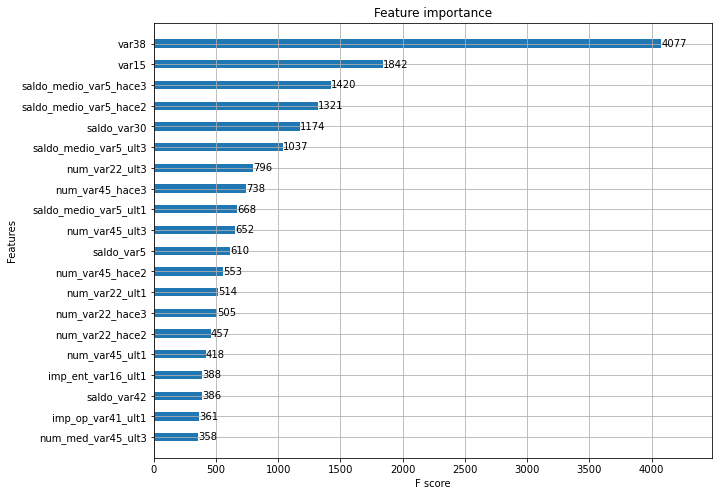

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize = (10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features =20, height=0.4)

In [30]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric="auc", eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC_AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC_AUC : 0.8396


In [31]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_setimators를 200으로 감소 
lgbm_clf = LGBMClassifier(n_estimators = 200)

params = {'num_leaves' : [32, 64],
         'max_depth' : [128,160],
         'min_child_samples' : [60,100],
         'subsample' : [0.8, 1]}

#cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc", eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 : ', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076	

[77]	valid_0's auc: 0.88853	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.839998	valid_1's binary_logloss: 0.139765
Early stopping, best iteration is:
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063


C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076	

[71]	valid_0's auc: 0.887299	valid_0's binary_logloss: 0.118387	valid_1's auc: 0.839869	valid_1's binary_logloss: 0.139594
[72]	valid_0's auc: 0.887483	valid_0's binary_logloss: 0.118281	valid_1's auc: 0.839788	valid_1's binary_logloss: 0.139654
[73]	valid_0's auc: 0.887557	valid_0's binary_logloss: 0.118196	valid_1's auc: 0.840147	valid_1's binary_logloss: 0.139624
[74]	valid_0's auc: 0.887851	valid_0's binary_logloss: 0.118068	valid_1's auc: 0.840137	valid_1's binary_logloss: 0.139665
[75]	valid_0's auc: 0.888042	valid_0's binary_logloss: 0.117962	valid_1's auc: 0.840289	valid_1's binary_logloss: 0.139644
[76]	valid_0's auc: 0.888422	valid_0's binary_logloss: 0.11776	valid_1's auc: 0.83992	valid_1's binary_logloss: 0.139749
[77]	valid_0's auc: 0.88853	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.839998	valid_1's binary_logloss: 0.139765
Early stopping, best iteration is:
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_lo

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528	

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076	

[75]	valid_0's auc: 0.888042	valid_0's binary_logloss: 0.117962	valid_1's auc: 0.840289	valid_1's binary_logloss: 0.139644
[76]	valid_0's auc: 0.888422	valid_0's binary_logloss: 0.11776	valid_1's auc: 0.83992	valid_1's binary_logloss: 0.139749
[77]	valid_0's auc: 0.88853	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.839998	valid_1's binary_logloss: 0.139765
Early stopping, best iteration is:
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063


C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076	

[73]	valid_0's auc: 0.887557	valid_0's binary_logloss: 0.118196	valid_1's auc: 0.840147	valid_1's binary_logloss: 0.139624
[74]	valid_0's auc: 0.887851	valid_0's binary_logloss: 0.118068	valid_1's auc: 0.840137	valid_1's binary_logloss: 0.139665
[75]	valid_0's auc: 0.888042	valid_0's binary_logloss: 0.117962	valid_1's auc: 0.840289	valid_1's binary_logloss: 0.139644
[76]	valid_0's auc: 0.888422	valid_0's binary_logloss: 0.11776	valid_1's auc: 0.83992	valid_1's binary_logloss: 0.139749
[77]	valid_0's auc: 0.88853	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.839998	valid_1's binary_logloss: 0.139765
Early stopping, best iteration is:
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063


C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824305	valid_0's binary_logloss: 0.156217	valid_1's auc: 0.819488	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828884	valid_0's binary_logloss: 0.150957	valid_1's auc: 0.822387	valid_1's binary_logloss: 0.159711
[3]	valid_0's auc: 0.838845	valid_0's binary_logloss: 0.147117	valid_1's auc: 0.829542	valid_1's binary_logloss: 0.156068
[4]	valid_0's auc: 0.843406	valid_0's binary_logloss: 0.144114	valid_1's auc: 0.834917	valid_1's binary_logloss: 0.153141
[5]	valid_0's auc: 0.846391	valid_0's binary_logloss: 0.141629	valid_1's auc: 0.837871	valid_1's binary_logloss: 0.150804
[6]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.13957	valid_1's auc: 0.839548	valid_1's binary_logloss: 0.148876
[7]	valid_0's auc: 0.851133	valid_0's binary_logloss: 0.137847	valid_1's auc: 0.841812	valid_1's binary_logloss: 0.147225
[8]	valid_0's auc: 0.852859	valid_0's binary_logloss: 0.136394	valid_1's auc: 0.842382

In [33]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 32, subsample = 0.8, min_child_samples = 100, max_depth = 128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric="auc", eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss:

### LGBM

In [35]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "auc", eval_set= evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC_AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC_AUC : 0.8396


In [36]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimator를 200으로 감소 
lgbm_clf =LGBMClassifier(n_estimators = 200 )

params = {'num_leavs' : [32, 64],
         'max_depth' : [128, 160],
         'min_child_samples' : [60 , 100],
         'subsample' : [0.8, 1 ]}

#cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = "auc", 
          eval_set = [(X_train, y_train), (X_test , y_test)])

print('GridSearchCV 최적 파라미터 : ', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165028
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82554	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.82137	valid_1's binary_logloss: 0.159952
[3]	valid_0's auc: 0.832031	valid_0's binary_logloss: 0.147226	valid_1's auc: 0.827132	valid_1's binary_logloss: 0.156455
[4]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.144217	valid_1's auc: 0.832866	valid_1's binary_logloss: 0.153434
[5]	valid_0's auc: 0.840418	valid_0's binary_logloss: 0.141792	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.151068
[6]	valid_0's auc: 0.843871	valid_0's binary_logloss: 0.13977	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.149144
[7]	valid_0's auc: 0.84494	valid_0's binary_logloss: 0.138162	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.147615
[8]	valid_0's auc: 0.847249	valid_0's binary_logloss: 0.136757	valid_1's auc: 0.838487	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.165402
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827194	valid_0's binary_logloss: 0.151089	valid_1's auc: 0.819969	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.83683	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828698	valid_1's binary_logloss: 0.156402
[4]	valid_0's auc: 0.8414	valid_0's binary_logloss: 0.14426	valid_1's auc: 0.830862	valid_1's binary_logloss: 0.153538
[5]	valid_0's auc: 0.843723	valid_0's binary_logloss: 0.141767	valid_1's auc: 0.833047	valid_1's binary_logloss: 0.151263
[6]	valid_0's auc: 0.847588	valid_0's binary_logloss: 0.139751	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.149422
[7]	valid_0's auc: 0.849314	valid_0's binary_logloss: 0.138022	valid_1's auc: 0.836373	valid_1's binary_logloss: 0.14783
[8]	valid_0's auc: 0.850251	valid_0's binary_logloss: 0.136588	valid_1's auc: 0.838099	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156554	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827661	valid_0's binary_logloss: 0.151222	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.160027
[3]	valid_0's auc: 0.836006	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.828003	valid_1's binary_logloss: 0.156533
[4]	valid_0's auc: 0.840423	valid_0's binary_logloss: 0.144322	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.842401	valid_0's binary_logloss: 0.141848	valid_1's auc: 0.833643	valid_1's binary_logloss: 0.151345
[6]	valid_0's auc: 0.843946	valid_0's binary_logloss: 0.139789	valid_1's auc: 0.833078	valid_1's binary_logloss: 0.149524
[7]	valid_0's auc: 0.844935	valid_0's binary_logloss: 0.138153	valid_1's auc: 0.833371	valid_1's binary_logloss: 0.148102
[8]	valid_0's auc: 0.846355	valid_0's binary_logloss: 0.136689	valid_1's auc: 0.834624	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165028
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82554	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.82137	valid_1's binary_logloss: 0.159952
[3]	valid_0's auc: 0.832031	valid_0's binary_logloss: 0.147226	valid_1's auc: 0.827132	valid_1's binary_logloss: 0.156455
[4]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.144217	valid_1's auc: 0.832866	valid_1's binary_logloss: 0.153434
[5]	valid_0's auc: 0.840418	valid_0's binary_logloss: 0.141792	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.151068
[6]	valid_0's auc: 0.843871	valid_0's binary_logloss: 0.13977	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.149144
[7]	valid_0's auc: 0.84494	valid_0's binary_logloss: 0.138162	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.147615
[8]	valid_0's auc: 0.847249	valid_0's binary_logloss: 0.136757	valid_1's auc: 0.838487	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.165402
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827194	valid_0's binary_logloss: 0.151089	valid_1's auc: 0.819969	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.83683	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828698	valid_1's binary_logloss: 0.156402
[4]	valid_0's auc: 0.8414	valid_0's binary_logloss: 0.14426	valid_1's auc: 0.830862	valid_1's binary_logloss: 0.153538
[5]	valid_0's auc: 0.843723	valid_0's binary_logloss: 0.141767	valid_1's auc: 0.833047	valid_1's binary_logloss: 0.151263
[6]	valid_0's auc: 0.847588	valid_0's binary_logloss: 0.139751	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.149422
[7]	valid_0's auc: 0.849314	valid_0's binary_logloss: 0.138022	valid_1's auc: 0.836373	valid_1's binary_logloss: 0.14783
[8]	valid_0's auc: 0.850251	valid_0's binary_logloss: 0.136588	valid_1's auc: 0.838099	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156554	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827661	valid_0's binary_logloss: 0.151222	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.160027
[3]	valid_0's auc: 0.836006	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.828003	valid_1's binary_logloss: 0.156533
[4]	valid_0's auc: 0.840423	valid_0's binary_logloss: 0.144322	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.842401	valid_0's binary_logloss: 0.141848	valid_1's auc: 0.833643	valid_1's binary_logloss: 0.151345
[6]	valid_0's auc: 0.843946	valid_0's binary_logloss: 0.139789	valid_1's auc: 0.833078	valid_1's binary_logloss: 0.149524
[7]	valid_0's auc: 0.844935	valid_0's binary_logloss: 0.138153	valid_1's auc: 0.833371	valid_1's binary_logloss: 0.148102
[8]	valid_0's auc: 0.846355	valid_0's binary_logloss: 0.136689	valid_1's auc: 0.834624	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165028
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82554	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.82137	valid_1's binary_logloss: 0.159952
[3]	valid_0's auc: 0.832031	valid_0's binary_logloss: 0.147226	valid_1's auc: 0.827132	valid_1's binary_logloss: 0.156455
[4]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.144217	valid_1's auc: 0.832866	valid_1's binary_logloss: 0.153434
[5]	valid_0's auc: 0.840418	valid_0's binary_logloss: 0.141792	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.151068
[6]	valid_0's auc: 0.843871	valid_0's binary_logloss: 0.13977	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.149144
[7]	valid_0's auc: 0.84494	valid_0's binary_logloss: 0.138162	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.147615
[8]	valid_0's auc: 0.847249	valid_0's binary_logloss: 0.136757	valid_1's auc: 0.838487	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.165402
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827194	valid_0's binary_logloss: 0.151089	valid_1's auc: 0.819969	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.83683	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828698	valid_1's binary_logloss: 0.156402
[4]	valid_0's auc: 0.8414	valid_0's binary_logloss: 0.14426	valid_1's auc: 0.830862	valid_1's binary_logloss: 0.153538
[5]	valid_0's auc: 0.843723	valid_0's binary_logloss: 0.141767	valid_1's auc: 0.833047	valid_1's binary_logloss: 0.151263
[6]	valid_0's auc: 0.847588	valid_0's binary_logloss: 0.139751	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.149422
[7]	valid_0's auc: 0.849314	valid_0's binary_logloss: 0.138022	valid_1's auc: 0.836373	valid_1's binary_logloss: 0.14783
[8]	valid_0's auc: 0.850251	valid_0's binary_logloss: 0.136588	valid_1's auc: 0.838099	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156554	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827661	valid_0's binary_logloss: 0.151222	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.160027
[3]	valid_0's auc: 0.836006	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.828003	valid_1's binary_logloss: 0.156533
[4]	valid_0's auc: 0.840423	valid_0's binary_logloss: 0.144322	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.842401	valid_0's binary_logloss: 0.141848	valid_1's auc: 0.833643	valid_1's binary_logloss: 0.151345
[6]	valid_0's auc: 0.843946	valid_0's binary_logloss: 0.139789	valid_1's auc: 0.833078	valid_1's binary_logloss: 0.149524
[7]	valid_0's auc: 0.844935	valid_0's binary_logloss: 0.138153	valid_1's auc: 0.833371	valid_1's binary_logloss: 0.148102
[8]	valid_0's auc: 0.846355	valid_0's binary_logloss: 0.136689	valid_1's auc: 0.834624	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165028
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82554	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.82137	valid_1's binary_logloss: 0.159952
[3]	valid_0's auc: 0.832031	valid_0's binary_logloss: 0.147226	valid_1's auc: 0.827132	valid_1's binary_logloss: 0.156455
[4]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.144217	valid_1's auc: 0.832866	valid_1's binary_logloss: 0.153434
[5]	valid_0's auc: 0.840418	valid_0's binary_logloss: 0.141792	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.151068
[6]	valid_0's auc: 0.843871	valid_0's binary_logloss: 0.13977	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.149144
[7]	valid_0's auc: 0.84494	valid_0's binary_logloss: 0.138162	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.147615
[8]	valid_0's auc: 0.847249	valid_0's binary_logloss: 0.136757	valid_1's auc: 0.838487	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.165402
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827194	valid_0's binary_logloss: 0.151089	valid_1's auc: 0.819969	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.83683	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828698	valid_1's binary_logloss: 0.156402
[4]	valid_0's auc: 0.8414	valid_0's binary_logloss: 0.14426	valid_1's auc: 0.830862	valid_1's binary_logloss: 0.153538
[5]	valid_0's auc: 0.843723	valid_0's binary_logloss: 0.141767	valid_1's auc: 0.833047	valid_1's binary_logloss: 0.151263
[6]	valid_0's auc: 0.847588	valid_0's binary_logloss: 0.139751	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.149422
[7]	valid_0's auc: 0.849314	valid_0's binary_logloss: 0.138022	valid_1's auc: 0.836373	valid_1's binary_logloss: 0.14783
[8]	valid_0's auc: 0.850251	valid_0's binary_logloss: 0.136588	valid_1's auc: 0.838099	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156554	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827661	valid_0's binary_logloss: 0.151222	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.160027
[3]	valid_0's auc: 0.836006	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.828003	valid_1's binary_logloss: 0.156533
[4]	valid_0's auc: 0.840423	valid_0's binary_logloss: 0.144322	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.842401	valid_0's binary_logloss: 0.141848	valid_1's auc: 0.833643	valid_1's binary_logloss: 0.151345
[6]	valid_0's auc: 0.843946	valid_0's binary_logloss: 0.139789	valid_1's auc: 0.833078	valid_1's binary_logloss: 0.149524
[7]	valid_0's auc: 0.844935	valid_0's binary_logloss: 0.138153	valid_1's auc: 0.833371	valid_1's binary_logloss: 0.148102
[8]	valid_0's auc: 0.846355	valid_0's binary_logloss: 0.136689	valid_1's auc: 0.834624	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165107
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829038	valid_0's binary_logloss: 0.151213	valid_1's auc: 0.82365	valid_1's binary_logloss: 0.160048
[3]	valid_0's auc: 0.835703	valid_0's binary_logloss: 0.147433	valid_1's auc: 0.829418	valid_1's binary_logloss: 0.156285
[4]	valid_0's auc: 0.839303	valid_0's binary_logloss: 0.144502	valid_1's auc: 0.834115	valid_1's binary_logloss: 0.153274
[5]	valid_0's auc: 0.843016	valid_0's binary_logloss: 0.142177	valid_1's auc: 0.834396	valid_1's binary_logloss: 0.151038
[6]	valid_0's auc: 0.845558	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.834893	valid_1's binary_logloss: 0.149143
[7]	valid_0's auc: 0.846635	valid_0's binary_logloss: 0.138572	valid_1's auc: 0.836982	valid_1's binary_logloss: 0.147506
[8]	valid_0's auc: 0.847022	valid_0's binary_logloss: 0.137205	valid_1's auc: 0.837694

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156485	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165223
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828111	valid_0's binary_logloss: 0.151153	valid_1's auc: 0.82215	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.836972	valid_0's binary_logloss: 0.14739	valid_1's auc: 0.830902	valid_1's binary_logloss: 0.156065
[4]	valid_0's auc: 0.84058	valid_0's binary_logloss: 0.14447	valid_1's auc: 0.834791	valid_1's binary_logloss: 0.153171
[5]	valid_0's auc: 0.843586	valid_0's binary_logloss: 0.142056	valid_1's auc: 0.837187	valid_1's binary_logloss: 0.150805
[6]	valid_0's auc: 0.846742	valid_0's binary_logloss: 0.140044	valid_1's auc: 0.83869	valid_1's binary_logloss: 0.149073
[7]	valid_0's auc: 0.848705	valid_0's binary_logloss: 0.138388	valid_1's auc: 0.83895	valid_1's binary_logloss: 0.147542
[8]	valid_0's auc: 0.850799	valid_0's binary_logloss: 0.136983	valid_1's auc: 0.838732	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156605	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165249
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827779	valid_0's binary_logloss: 0.151376	valid_1's auc: 0.821671	valid_1's binary_logloss: 0.160225
[3]	valid_0's auc: 0.837468	valid_0's binary_logloss: 0.14753	valid_1's auc: 0.829668	valid_1's binary_logloss: 0.156482
[4]	valid_0's auc: 0.840477	valid_0's binary_logloss: 0.144495	valid_1's auc: 0.832408	valid_1's binary_logloss: 0.153481
[5]	valid_0's auc: 0.842821	valid_0's binary_logloss: 0.14214	valid_1's auc: 0.834724	valid_1's binary_logloss: 0.151177
[6]	valid_0's auc: 0.843625	valid_0's binary_logloss: 0.140207	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149315
[7]	valid_0's auc: 0.845153	valid_0's binary_logloss: 0.138532	valid_1's auc: 0.836274	valid_1's binary_logloss: 0.147747
[8]	valid_0's auc: 0.847038	valid_0's binary_logloss: 0.137159	valid_1's auc: 0.837062	

[74]	valid_0's auc: 0.890037	valid_0's binary_logloss: 0.117882	valid_1's auc: 0.838484	valid_1's binary_logloss: 0.139899
[75]	valid_0's auc: 0.890438	valid_0's binary_logloss: 0.117729	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.139909
[76]	valid_0's auc: 0.890958	valid_0's binary_logloss: 0.117511	valid_1's auc: 0.838387	valid_1's binary_logloss: 0.139943
[77]	valid_0's auc: 0.891077	valid_0's binary_logloss: 0.117419	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.140036
[78]	valid_0's auc: 0.891118	valid_0's binary_logloss: 0.117348	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.140028
[79]	valid_0's auc: 0.891655	valid_0's binary_logloss: 0.117191	valid_1's auc: 0.838344	valid_1's binary_logloss: 0.140076
[80]	valid_0's auc: 0.891761	valid_0's binary_logloss: 0.117108	valid_1's auc: 0.838281	valid_1's binary_logloss: 0.140074
[81]	valid_0's auc: 0.891898	valid_0's binary_logloss: 0.117023	valid_1's auc: 0.838077	valid_1's binary_logloss: 0.140114
[82]	valid_0's a

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165107
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829038	valid_0's binary_logloss: 0.151213	valid_1's auc: 0.82365	valid_1's binary_logloss: 0.160048
[3]	valid_0's auc: 0.835703	valid_0's binary_logloss: 0.147433	valid_1's auc: 0.829418	valid_1's binary_logloss: 0.156285
[4]	valid_0's auc: 0.839303	valid_0's binary_logloss: 0.144502	valid_1's auc: 0.834115	valid_1's binary_logloss: 0.153274
[5]	valid_0's auc: 0.843016	valid_0's binary_logloss: 0.142177	valid_1's auc: 0.834396	valid_1's binary_logloss: 0.151038
[6]	valid_0's auc: 0.845558	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.834893	valid_1's binary_logloss: 0.149143
[7]	valid_0's auc: 0.846635	valid_0's binary_logloss: 0.138572	valid_1's auc: 0.836982	valid_1's binary_logloss: 0.147506
[8]	valid_0's auc: 0.847022	valid_0's binary_logloss: 0.137205	valid_1's auc: 0.837694

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156485	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165223
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828111	valid_0's binary_logloss: 0.151153	valid_1's auc: 0.82215	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.836972	valid_0's binary_logloss: 0.14739	valid_1's auc: 0.830902	valid_1's binary_logloss: 0.156065
[4]	valid_0's auc: 0.84058	valid_0's binary_logloss: 0.14447	valid_1's auc: 0.834791	valid_1's binary_logloss: 0.153171
[5]	valid_0's auc: 0.843586	valid_0's binary_logloss: 0.142056	valid_1's auc: 0.837187	valid_1's binary_logloss: 0.150805
[6]	valid_0's auc: 0.846742	valid_0's binary_logloss: 0.140044	valid_1's auc: 0.83869	valid_1's binary_logloss: 0.149073
[7]	valid_0's auc: 0.848705	valid_0's binary_logloss: 0.138388	valid_1's auc: 0.83895	valid_1's binary_logloss: 0.147542
[8]	valid_0's auc: 0.850799	valid_0's binary_logloss: 0.136983	valid_1's auc: 0.838732	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156605	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165249
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827779	valid_0's binary_logloss: 0.151376	valid_1's auc: 0.821671	valid_1's binary_logloss: 0.160225
[3]	valid_0's auc: 0.837468	valid_0's binary_logloss: 0.14753	valid_1's auc: 0.829668	valid_1's binary_logloss: 0.156482
[4]	valid_0's auc: 0.840477	valid_0's binary_logloss: 0.144495	valid_1's auc: 0.832408	valid_1's binary_logloss: 0.153481
[5]	valid_0's auc: 0.842821	valid_0's binary_logloss: 0.14214	valid_1's auc: 0.834724	valid_1's binary_logloss: 0.151177
[6]	valid_0's auc: 0.843625	valid_0's binary_logloss: 0.140207	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149315
[7]	valid_0's auc: 0.845153	valid_0's binary_logloss: 0.138532	valid_1's auc: 0.836274	valid_1's binary_logloss: 0.147747
[8]	valid_0's auc: 0.847038	valid_0's binary_logloss: 0.137159	valid_1's auc: 0.837062	

[75]	valid_0's auc: 0.890438	valid_0's binary_logloss: 0.117729	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.139909
[76]	valid_0's auc: 0.890958	valid_0's binary_logloss: 0.117511	valid_1's auc: 0.838387	valid_1's binary_logloss: 0.139943
[77]	valid_0's auc: 0.891077	valid_0's binary_logloss: 0.117419	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.140036
[78]	valid_0's auc: 0.891118	valid_0's binary_logloss: 0.117348	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.140028
[79]	valid_0's auc: 0.891655	valid_0's binary_logloss: 0.117191	valid_1's auc: 0.838344	valid_1's binary_logloss: 0.140076
[80]	valid_0's auc: 0.891761	valid_0's binary_logloss: 0.117108	valid_1's auc: 0.838281	valid_1's binary_logloss: 0.140074
[81]	valid_0's auc: 0.891898	valid_0's binary_logloss: 0.117023	valid_1's auc: 0.838077	valid_1's binary_logloss: 0.140114
[82]	valid_0's auc: 0.891955	valid_0's binary_logloss: 0.116968	valid_1's auc: 0.837958	valid_1's binary_logloss: 0.140184
[83]	valid_0's a

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165107
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829038	valid_0's binary_logloss: 0.151213	valid_1's auc: 0.82365	valid_1's binary_logloss: 0.160048
[3]	valid_0's auc: 0.835703	valid_0's binary_logloss: 0.147433	valid_1's auc: 0.829418	valid_1's binary_logloss: 0.156285
[4]	valid_0's auc: 0.839303	valid_0's binary_logloss: 0.144502	valid_1's auc: 0.834115	valid_1's binary_logloss: 0.153274
[5]	valid_0's auc: 0.843016	valid_0's binary_logloss: 0.142177	valid_1's auc: 0.834396	valid_1's binary_logloss: 0.151038
[6]	valid_0's auc: 0.845558	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.834893	valid_1's binary_logloss: 0.149143
[7]	valid_0's auc: 0.846635	valid_0's binary_logloss: 0.138572	valid_1's auc: 0.836982	valid_1's binary_logloss: 0.147506
[8]	valid_0's auc: 0.847022	valid_0's binary_logloss: 0.137205	valid_1's auc: 0.837694

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156485	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165223
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828111	valid_0's binary_logloss: 0.151153	valid_1's auc: 0.82215	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.836972	valid_0's binary_logloss: 0.14739	valid_1's auc: 0.830902	valid_1's binary_logloss: 0.156065
[4]	valid_0's auc: 0.84058	valid_0's binary_logloss: 0.14447	valid_1's auc: 0.834791	valid_1's binary_logloss: 0.153171
[5]	valid_0's auc: 0.843586	valid_0's binary_logloss: 0.142056	valid_1's auc: 0.837187	valid_1's binary_logloss: 0.150805
[6]	valid_0's auc: 0.846742	valid_0's binary_logloss: 0.140044	valid_1's auc: 0.83869	valid_1's binary_logloss: 0.149073
[7]	valid_0's auc: 0.848705	valid_0's binary_logloss: 0.138388	valid_1's auc: 0.83895	valid_1's binary_logloss: 0.147542
[8]	valid_0's auc: 0.850799	valid_0's binary_logloss: 0.136983	valid_1's auc: 0.838732	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156605	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165249
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827779	valid_0's binary_logloss: 0.151376	valid_1's auc: 0.821671	valid_1's binary_logloss: 0.160225
[3]	valid_0's auc: 0.837468	valid_0's binary_logloss: 0.14753	valid_1's auc: 0.829668	valid_1's binary_logloss: 0.156482
[4]	valid_0's auc: 0.840477	valid_0's binary_logloss: 0.144495	valid_1's auc: 0.832408	valid_1's binary_logloss: 0.153481
[5]	valid_0's auc: 0.842821	valid_0's binary_logloss: 0.14214	valid_1's auc: 0.834724	valid_1's binary_logloss: 0.151177
[6]	valid_0's auc: 0.843625	valid_0's binary_logloss: 0.140207	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149315
[7]	valid_0's auc: 0.845153	valid_0's binary_logloss: 0.138532	valid_1's auc: 0.836274	valid_1's binary_logloss: 0.147747
[8]	valid_0's auc: 0.847038	valid_0's binary_logloss: 0.137159	valid_1's auc: 0.837062	

[80]	valid_0's auc: 0.891761	valid_0's binary_logloss: 0.117108	valid_1's auc: 0.838281	valid_1's binary_logloss: 0.140074
[81]	valid_0's auc: 0.891898	valid_0's binary_logloss: 0.117023	valid_1's auc: 0.838077	valid_1's binary_logloss: 0.140114
[82]	valid_0's auc: 0.891955	valid_0's binary_logloss: 0.116968	valid_1's auc: 0.837958	valid_1's binary_logloss: 0.140184
[83]	valid_0's auc: 0.892406	valid_0's binary_logloss: 0.116847	valid_1's auc: 0.837752	valid_1's binary_logloss: 0.140242
Early stopping, best iteration is:
[53]	valid_0's auc: 0.883792	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.8404	valid_1's binary_logloss: 0.139167


C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165107
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829038	valid_0's binary_logloss: 0.151213	valid_1's auc: 0.82365	valid_1's binary_logloss: 0.160048
[3]	valid_0's auc: 0.835703	valid_0's binary_logloss: 0.147433	valid_1's auc: 0.829418	valid_1's binary_logloss: 0.156285
[4]	valid_0's auc: 0.839303	valid_0's binary_logloss: 0.144502	valid_1's auc: 0.834115	valid_1's binary_logloss: 0.153274
[5]	valid_0's auc: 0.843016	valid_0's binary_logloss: 0.142177	valid_1's auc: 0.834396	valid_1's binary_logloss: 0.151038
[6]	valid_0's auc: 0.845558	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.834893	valid_1's binary_logloss: 0.149143
[7]	valid_0's auc: 0.846635	valid_0's binary_logloss: 0.138572	valid_1's auc: 0.836982	valid_1's binary_logloss: 0.147506
[8]	valid_0's auc: 0.847022	valid_0's binary_logloss: 0.137205	valid_1's auc: 0.837694

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156485	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165223
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828111	valid_0's binary_logloss: 0.151153	valid_1's auc: 0.82215	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.836972	valid_0's binary_logloss: 0.14739	valid_1's auc: 0.830902	valid_1's binary_logloss: 0.156065
[4]	valid_0's auc: 0.84058	valid_0's binary_logloss: 0.14447	valid_1's auc: 0.834791	valid_1's binary_logloss: 0.153171
[5]	valid_0's auc: 0.843586	valid_0's binary_logloss: 0.142056	valid_1's auc: 0.837187	valid_1's binary_logloss: 0.150805
[6]	valid_0's auc: 0.846742	valid_0's binary_logloss: 0.140044	valid_1's auc: 0.83869	valid_1's binary_logloss: 0.149073
[7]	valid_0's auc: 0.848705	valid_0's binary_logloss: 0.138388	valid_1's auc: 0.83895	valid_1's binary_logloss: 0.147542
[8]	valid_0's auc: 0.850799	valid_0's binary_logloss: 0.136983	valid_1's auc: 0.838732	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156605	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165249
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827779	valid_0's binary_logloss: 0.151376	valid_1's auc: 0.821671	valid_1's binary_logloss: 0.160225
[3]	valid_0's auc: 0.837468	valid_0's binary_logloss: 0.14753	valid_1's auc: 0.829668	valid_1's binary_logloss: 0.156482
[4]	valid_0's auc: 0.840477	valid_0's binary_logloss: 0.144495	valid_1's auc: 0.832408	valid_1's binary_logloss: 0.153481
[5]	valid_0's auc: 0.842821	valid_0's binary_logloss: 0.14214	valid_1's auc: 0.834724	valid_1's binary_logloss: 0.151177
[6]	valid_0's auc: 0.843625	valid_0's binary_logloss: 0.140207	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149315
[7]	valid_0's auc: 0.845153	valid_0's binary_logloss: 0.138532	valid_1's auc: 0.836274	valid_1's binary_logloss: 0.147747
[8]	valid_0's auc: 0.847038	valid_0's binary_logloss: 0.137159	valid_1's auc: 0.837062	

[78]	valid_0's auc: 0.891118	valid_0's binary_logloss: 0.117348	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.140028
[79]	valid_0's auc: 0.891655	valid_0's binary_logloss: 0.117191	valid_1's auc: 0.838344	valid_1's binary_logloss: 0.140076
[80]	valid_0's auc: 0.891761	valid_0's binary_logloss: 0.117108	valid_1's auc: 0.838281	valid_1's binary_logloss: 0.140074
[81]	valid_0's auc: 0.891898	valid_0's binary_logloss: 0.117023	valid_1's auc: 0.838077	valid_1's binary_logloss: 0.140114
[82]	valid_0's auc: 0.891955	valid_0's binary_logloss: 0.116968	valid_1's auc: 0.837958	valid_1's binary_logloss: 0.140184
[83]	valid_0's auc: 0.892406	valid_0's binary_logloss: 0.116847	valid_1's auc: 0.837752	valid_1's binary_logloss: 0.140242
Early stopping, best iteration is:
[53]	valid_0's auc: 0.883792	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.8404	valid_1's binary_logloss: 0.139167


C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165028
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82554	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.82137	valid_1's binary_logloss: 0.159952
[3]	valid_0's auc: 0.832031	valid_0's binary_logloss: 0.147226	valid_1's auc: 0.827132	valid_1's binary_logloss: 0.156455
[4]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.144217	valid_1's auc: 0.832866	valid_1's binary_logloss: 0.153434
[5]	valid_0's auc: 0.840418	valid_0's binary_logloss: 0.141792	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.151068
[6]	valid_0's auc: 0.843871	valid_0's binary_logloss: 0.13977	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.149144
[7]	valid_0's auc: 0.84494	valid_0's binary_logloss: 0.138162	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.147615
[8]	valid_0's auc: 0.847249	valid_0's binary_logloss: 0.136757	valid_1's auc: 0.838487	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.165402
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827194	valid_0's binary_logloss: 0.151089	valid_1's auc: 0.819969	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.83683	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828698	valid_1's binary_logloss: 0.156402
[4]	valid_0's auc: 0.8414	valid_0's binary_logloss: 0.14426	valid_1's auc: 0.830862	valid_1's binary_logloss: 0.153538
[5]	valid_0's auc: 0.843723	valid_0's binary_logloss: 0.141767	valid_1's auc: 0.833047	valid_1's binary_logloss: 0.151263
[6]	valid_0's auc: 0.847588	valid_0's binary_logloss: 0.139751	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.149422
[7]	valid_0's auc: 0.849314	valid_0's binary_logloss: 0.138022	valid_1's auc: 0.836373	valid_1's binary_logloss: 0.14783
[8]	valid_0's auc: 0.850251	valid_0's binary_logloss: 0.136588	valid_1's auc: 0.838099	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156554	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827661	valid_0's binary_logloss: 0.151222	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.160027
[3]	valid_0's auc: 0.836006	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.828003	valid_1's binary_logloss: 0.156533
[4]	valid_0's auc: 0.840423	valid_0's binary_logloss: 0.144322	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.842401	valid_0's binary_logloss: 0.141848	valid_1's auc: 0.833643	valid_1's binary_logloss: 0.151345
[6]	valid_0's auc: 0.843946	valid_0's binary_logloss: 0.139789	valid_1's auc: 0.833078	valid_1's binary_logloss: 0.149524
[7]	valid_0's auc: 0.844935	valid_0's binary_logloss: 0.138153	valid_1's auc: 0.833371	valid_1's binary_logloss: 0.148102
[8]	valid_0's auc: 0.846355	valid_0's binary_logloss: 0.136689	valid_1's auc: 0.834624	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165028
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82554	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.82137	valid_1's binary_logloss: 0.159952
[3]	valid_0's auc: 0.832031	valid_0's binary_logloss: 0.147226	valid_1's auc: 0.827132	valid_1's binary_logloss: 0.156455
[4]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.144217	valid_1's auc: 0.832866	valid_1's binary_logloss: 0.153434
[5]	valid_0's auc: 0.840418	valid_0's binary_logloss: 0.141792	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.151068
[6]	valid_0's auc: 0.843871	valid_0's binary_logloss: 0.13977	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.149144
[7]	valid_0's auc: 0.84494	valid_0's binary_logloss: 0.138162	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.147615
[8]	valid_0's auc: 0.847249	valid_0's binary_logloss: 0.136757	valid_1's auc: 0.838487	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.165402
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827194	valid_0's binary_logloss: 0.151089	valid_1's auc: 0.819969	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.83683	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828698	valid_1's binary_logloss: 0.156402
[4]	valid_0's auc: 0.8414	valid_0's binary_logloss: 0.14426	valid_1's auc: 0.830862	valid_1's binary_logloss: 0.153538
[5]	valid_0's auc: 0.843723	valid_0's binary_logloss: 0.141767	valid_1's auc: 0.833047	valid_1's binary_logloss: 0.151263
[6]	valid_0's auc: 0.847588	valid_0's binary_logloss: 0.139751	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.149422
[7]	valid_0's auc: 0.849314	valid_0's binary_logloss: 0.138022	valid_1's auc: 0.836373	valid_1's binary_logloss: 0.14783
[8]	valid_0's auc: 0.850251	valid_0's binary_logloss: 0.136588	valid_1's auc: 0.838099	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156554	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827661	valid_0's binary_logloss: 0.151222	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.160027
[3]	valid_0's auc: 0.836006	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.828003	valid_1's binary_logloss: 0.156533
[4]	valid_0's auc: 0.840423	valid_0's binary_logloss: 0.144322	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.842401	valid_0's binary_logloss: 0.141848	valid_1's auc: 0.833643	valid_1's binary_logloss: 0.151345
[6]	valid_0's auc: 0.843946	valid_0's binary_logloss: 0.139789	valid_1's auc: 0.833078	valid_1's binary_logloss: 0.149524
[7]	valid_0's auc: 0.844935	valid_0's binary_logloss: 0.138153	valid_1's auc: 0.833371	valid_1's binary_logloss: 0.148102
[8]	valid_0's auc: 0.846355	valid_0's binary_logloss: 0.136689	valid_1's auc: 0.834624	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165028
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82554	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.82137	valid_1's binary_logloss: 0.159952
[3]	valid_0's auc: 0.832031	valid_0's binary_logloss: 0.147226	valid_1's auc: 0.827132	valid_1's binary_logloss: 0.156455
[4]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.144217	valid_1's auc: 0.832866	valid_1's binary_logloss: 0.153434
[5]	valid_0's auc: 0.840418	valid_0's binary_logloss: 0.141792	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.151068
[6]	valid_0's auc: 0.843871	valid_0's binary_logloss: 0.13977	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.149144
[7]	valid_0's auc: 0.84494	valid_0's binary_logloss: 0.138162	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.147615
[8]	valid_0's auc: 0.847249	valid_0's binary_logloss: 0.136757	valid_1's auc: 0.838487	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.165402
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827194	valid_0's binary_logloss: 0.151089	valid_1's auc: 0.819969	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.83683	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828698	valid_1's binary_logloss: 0.156402
[4]	valid_0's auc: 0.8414	valid_0's binary_logloss: 0.14426	valid_1's auc: 0.830862	valid_1's binary_logloss: 0.153538
[5]	valid_0's auc: 0.843723	valid_0's binary_logloss: 0.141767	valid_1's auc: 0.833047	valid_1's binary_logloss: 0.151263
[6]	valid_0's auc: 0.847588	valid_0's binary_logloss: 0.139751	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.149422
[7]	valid_0's auc: 0.849314	valid_0's binary_logloss: 0.138022	valid_1's auc: 0.836373	valid_1's binary_logloss: 0.14783
[8]	valid_0's auc: 0.850251	valid_0's binary_logloss: 0.136588	valid_1's auc: 0.838099	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156554	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827661	valid_0's binary_logloss: 0.151222	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.160027
[3]	valid_0's auc: 0.836006	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.828003	valid_1's binary_logloss: 0.156533
[4]	valid_0's auc: 0.840423	valid_0's binary_logloss: 0.144322	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.842401	valid_0's binary_logloss: 0.141848	valid_1's auc: 0.833643	valid_1's binary_logloss: 0.151345
[6]	valid_0's auc: 0.843946	valid_0's binary_logloss: 0.139789	valid_1's auc: 0.833078	valid_1's binary_logloss: 0.149524
[7]	valid_0's auc: 0.844935	valid_0's binary_logloss: 0.138153	valid_1's auc: 0.833371	valid_1's binary_logloss: 0.148102
[8]	valid_0's auc: 0.846355	valid_0's binary_logloss: 0.136689	valid_1's auc: 0.834624	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165028
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82554	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.82137	valid_1's binary_logloss: 0.159952
[3]	valid_0's auc: 0.832031	valid_0's binary_logloss: 0.147226	valid_1's auc: 0.827132	valid_1's binary_logloss: 0.156455
[4]	valid_0's auc: 0.837316	valid_0's binary_logloss: 0.144217	valid_1's auc: 0.832866	valid_1's binary_logloss: 0.153434
[5]	valid_0's auc: 0.840418	valid_0's binary_logloss: 0.141792	valid_1's auc: 0.835875	valid_1's binary_logloss: 0.151068
[6]	valid_0's auc: 0.843871	valid_0's binary_logloss: 0.13977	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.149144
[7]	valid_0's auc: 0.84494	valid_0's binary_logloss: 0.138162	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.147615
[8]	valid_0's auc: 0.847249	valid_0's binary_logloss: 0.136757	valid_1's auc: 0.838487	va

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814409	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813191	valid_1's binary_logloss: 0.165402
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827194	valid_0's binary_logloss: 0.151089	valid_1's auc: 0.819969	valid_1's binary_logloss: 0.160042
[3]	valid_0's auc: 0.83683	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828698	valid_1's binary_logloss: 0.156402
[4]	valid_0's auc: 0.8414	valid_0's binary_logloss: 0.14426	valid_1's auc: 0.830862	valid_1's binary_logloss: 0.153538
[5]	valid_0's auc: 0.843723	valid_0's binary_logloss: 0.141767	valid_1's auc: 0.833047	valid_1's binary_logloss: 0.151263
[6]	valid_0's auc: 0.847588	valid_0's binary_logloss: 0.139751	valid_1's auc: 0.836069	valid_1's binary_logloss: 0.149422
[7]	valid_0's auc: 0.849314	valid_0's binary_logloss: 0.138022	valid_1's auc: 0.836373	valid_1's binary_logloss: 0.14783
[8]	valid_0's auc: 0.850251	valid_0's binary_logloss: 0.136588	valid_1's auc: 0.838099	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156554	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827661	valid_0's binary_logloss: 0.151222	valid_1's auc: 0.822484	valid_1's binary_logloss: 0.160027
[3]	valid_0's auc: 0.836006	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.828003	valid_1's binary_logloss: 0.156533
[4]	valid_0's auc: 0.840423	valid_0's binary_logloss: 0.144322	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.15358
[5]	valid_0's auc: 0.842401	valid_0's binary_logloss: 0.141848	valid_1's auc: 0.833643	valid_1's binary_logloss: 0.151345
[6]	valid_0's auc: 0.843946	valid_0's binary_logloss: 0.139789	valid_1's auc: 0.833078	valid_1's binary_logloss: 0.149524
[7]	valid_0's auc: 0.844935	valid_0's binary_logloss: 0.138153	valid_1's auc: 0.833371	valid_1's binary_logloss: 0.148102
[8]	valid_0's auc: 0.846355	valid_0's binary_logloss: 0.136689	valid_1's auc: 0.834624	v

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165107
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829038	valid_0's binary_logloss: 0.151213	valid_1's auc: 0.82365	valid_1's binary_logloss: 0.160048
[3]	valid_0's auc: 0.835703	valid_0's binary_logloss: 0.147433	valid_1's auc: 0.829418	valid_1's binary_logloss: 0.156285
[4]	valid_0's auc: 0.839303	valid_0's binary_logloss: 0.144502	valid_1's auc: 0.834115	valid_1's binary_logloss: 0.153274
[5]	valid_0's auc: 0.843016	valid_0's binary_logloss: 0.142177	valid_1's auc: 0.834396	valid_1's binary_logloss: 0.151038
[6]	valid_0's auc: 0.845558	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.834893	valid_1's binary_logloss: 0.149143
[7]	valid_0's auc: 0.846635	valid_0's binary_logloss: 0.138572	valid_1's auc: 0.836982	valid_1's binary_logloss: 0.147506
[8]	valid_0's auc: 0.847022	valid_0's binary_logloss: 0.137205	valid_1's auc: 0.837694

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156485	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165223
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828111	valid_0's binary_logloss: 0.151153	valid_1's auc: 0.82215	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.836972	valid_0's binary_logloss: 0.14739	valid_1's auc: 0.830902	valid_1's binary_logloss: 0.156065
[4]	valid_0's auc: 0.84058	valid_0's binary_logloss: 0.14447	valid_1's auc: 0.834791	valid_1's binary_logloss: 0.153171
[5]	valid_0's auc: 0.843586	valid_0's binary_logloss: 0.142056	valid_1's auc: 0.837187	valid_1's binary_logloss: 0.150805
[6]	valid_0's auc: 0.846742	valid_0's binary_logloss: 0.140044	valid_1's auc: 0.83869	valid_1's binary_logloss: 0.149073
[7]	valid_0's auc: 0.848705	valid_0's binary_logloss: 0.138388	valid_1's auc: 0.83895	valid_1's binary_logloss: 0.147542
[8]	valid_0's auc: 0.850799	valid_0's binary_logloss: 0.136983	valid_1's auc: 0.838732	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156605	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165249
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827779	valid_0's binary_logloss: 0.151376	valid_1's auc: 0.821671	valid_1's binary_logloss: 0.160225
[3]	valid_0's auc: 0.837468	valid_0's binary_logloss: 0.14753	valid_1's auc: 0.829668	valid_1's binary_logloss: 0.156482
[4]	valid_0's auc: 0.840477	valid_0's binary_logloss: 0.144495	valid_1's auc: 0.832408	valid_1's binary_logloss: 0.153481
[5]	valid_0's auc: 0.842821	valid_0's binary_logloss: 0.14214	valid_1's auc: 0.834724	valid_1's binary_logloss: 0.151177
[6]	valid_0's auc: 0.843625	valid_0's binary_logloss: 0.140207	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149315
[7]	valid_0's auc: 0.845153	valid_0's binary_logloss: 0.138532	valid_1's auc: 0.836274	valid_1's binary_logloss: 0.147747
[8]	valid_0's auc: 0.847038	valid_0's binary_logloss: 0.137159	valid_1's auc: 0.837062	

[73]	valid_0's auc: 0.889887	valid_0's binary_logloss: 0.117972	valid_1's auc: 0.838556	valid_1's binary_logloss: 0.139911
[74]	valid_0's auc: 0.890037	valid_0's binary_logloss: 0.117882	valid_1's auc: 0.838484	valid_1's binary_logloss: 0.139899
[75]	valid_0's auc: 0.890438	valid_0's binary_logloss: 0.117729	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.139909
[76]	valid_0's auc: 0.890958	valid_0's binary_logloss: 0.117511	valid_1's auc: 0.838387	valid_1's binary_logloss: 0.139943
[77]	valid_0's auc: 0.891077	valid_0's binary_logloss: 0.117419	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.140036
[78]	valid_0's auc: 0.891118	valid_0's binary_logloss: 0.117348	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.140028
[79]	valid_0's auc: 0.891655	valid_0's binary_logloss: 0.117191	valid_1's auc: 0.838344	valid_1's binary_logloss: 0.140076
[80]	valid_0's auc: 0.891761	valid_0's binary_logloss: 0.117108	valid_1's auc: 0.838281	valid_1's binary_logloss: 0.140074
[81]	valid_0's a

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165107
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829038	valid_0's binary_logloss: 0.151213	valid_1's auc: 0.82365	valid_1's binary_logloss: 0.160048
[3]	valid_0's auc: 0.835703	valid_0's binary_logloss: 0.147433	valid_1's auc: 0.829418	valid_1's binary_logloss: 0.156285
[4]	valid_0's auc: 0.839303	valid_0's binary_logloss: 0.144502	valid_1's auc: 0.834115	valid_1's binary_logloss: 0.153274
[5]	valid_0's auc: 0.843016	valid_0's binary_logloss: 0.142177	valid_1's auc: 0.834396	valid_1's binary_logloss: 0.151038
[6]	valid_0's auc: 0.845558	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.834893	valid_1's binary_logloss: 0.149143
[7]	valid_0's auc: 0.846635	valid_0's binary_logloss: 0.138572	valid_1's auc: 0.836982	valid_1's binary_logloss: 0.147506
[8]	valid_0's auc: 0.847022	valid_0's binary_logloss: 0.137205	valid_1's auc: 0.837694

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156485	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165223
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828111	valid_0's binary_logloss: 0.151153	valid_1's auc: 0.82215	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.836972	valid_0's binary_logloss: 0.14739	valid_1's auc: 0.830902	valid_1's binary_logloss: 0.156065
[4]	valid_0's auc: 0.84058	valid_0's binary_logloss: 0.14447	valid_1's auc: 0.834791	valid_1's binary_logloss: 0.153171
[5]	valid_0's auc: 0.843586	valid_0's binary_logloss: 0.142056	valid_1's auc: 0.837187	valid_1's binary_logloss: 0.150805
[6]	valid_0's auc: 0.846742	valid_0's binary_logloss: 0.140044	valid_1's auc: 0.83869	valid_1's binary_logloss: 0.149073
[7]	valid_0's auc: 0.848705	valid_0's binary_logloss: 0.138388	valid_1's auc: 0.83895	valid_1's binary_logloss: 0.147542
[8]	valid_0's auc: 0.850799	valid_0's binary_logloss: 0.136983	valid_1's auc: 0.838732	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156605	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165249
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827779	valid_0's binary_logloss: 0.151376	valid_1's auc: 0.821671	valid_1's binary_logloss: 0.160225
[3]	valid_0's auc: 0.837468	valid_0's binary_logloss: 0.14753	valid_1's auc: 0.829668	valid_1's binary_logloss: 0.156482
[4]	valid_0's auc: 0.840477	valid_0's binary_logloss: 0.144495	valid_1's auc: 0.832408	valid_1's binary_logloss: 0.153481
[5]	valid_0's auc: 0.842821	valid_0's binary_logloss: 0.14214	valid_1's auc: 0.834724	valid_1's binary_logloss: 0.151177
[6]	valid_0's auc: 0.843625	valid_0's binary_logloss: 0.140207	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149315
[7]	valid_0's auc: 0.845153	valid_0's binary_logloss: 0.138532	valid_1's auc: 0.836274	valid_1's binary_logloss: 0.147747
[8]	valid_0's auc: 0.847038	valid_0's binary_logloss: 0.137159	valid_1's auc: 0.837062	

[71]	valid_0's auc: 0.889296	valid_0's binary_logloss: 0.118256	valid_1's auc: 0.838829	valid_1's binary_logloss: 0.139823
[72]	valid_0's auc: 0.889527	valid_0's binary_logloss: 0.118137	valid_1's auc: 0.838783	valid_1's binary_logloss: 0.139838
[73]	valid_0's auc: 0.889887	valid_0's binary_logloss: 0.117972	valid_1's auc: 0.838556	valid_1's binary_logloss: 0.139911
[74]	valid_0's auc: 0.890037	valid_0's binary_logloss: 0.117882	valid_1's auc: 0.838484	valid_1's binary_logloss: 0.139899
[75]	valid_0's auc: 0.890438	valid_0's binary_logloss: 0.117729	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.139909
[76]	valid_0's auc: 0.890958	valid_0's binary_logloss: 0.117511	valid_1's auc: 0.838387	valid_1's binary_logloss: 0.139943
[77]	valid_0's auc: 0.891077	valid_0's binary_logloss: 0.117419	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.140036
[78]	valid_0's auc: 0.891118	valid_0's binary_logloss: 0.117348	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.140028
[79]	valid_0's a

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165107
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829038	valid_0's binary_logloss: 0.151213	valid_1's auc: 0.82365	valid_1's binary_logloss: 0.160048
[3]	valid_0's auc: 0.835703	valid_0's binary_logloss: 0.147433	valid_1's auc: 0.829418	valid_1's binary_logloss: 0.156285
[4]	valid_0's auc: 0.839303	valid_0's binary_logloss: 0.144502	valid_1's auc: 0.834115	valid_1's binary_logloss: 0.153274
[5]	valid_0's auc: 0.843016	valid_0's binary_logloss: 0.142177	valid_1's auc: 0.834396	valid_1's binary_logloss: 0.151038
[6]	valid_0's auc: 0.845558	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.834893	valid_1's binary_logloss: 0.149143
[7]	valid_0's auc: 0.846635	valid_0's binary_logloss: 0.138572	valid_1's auc: 0.836982	valid_1's binary_logloss: 0.147506
[8]	valid_0's auc: 0.847022	valid_0's binary_logloss: 0.137205	valid_1's auc: 0.837694

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156485	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165223
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828111	valid_0's binary_logloss: 0.151153	valid_1's auc: 0.82215	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.836972	valid_0's binary_logloss: 0.14739	valid_1's auc: 0.830902	valid_1's binary_logloss: 0.156065
[4]	valid_0's auc: 0.84058	valid_0's binary_logloss: 0.14447	valid_1's auc: 0.834791	valid_1's binary_logloss: 0.153171
[5]	valid_0's auc: 0.843586	valid_0's binary_logloss: 0.142056	valid_1's auc: 0.837187	valid_1's binary_logloss: 0.150805
[6]	valid_0's auc: 0.846742	valid_0's binary_logloss: 0.140044	valid_1's auc: 0.83869	valid_1's binary_logloss: 0.149073
[7]	valid_0's auc: 0.848705	valid_0's binary_logloss: 0.138388	valid_1's auc: 0.83895	valid_1's binary_logloss: 0.147542
[8]	valid_0's auc: 0.850799	valid_0's binary_logloss: 0.136983	valid_1's auc: 0.838732	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156605	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165249
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827779	valid_0's binary_logloss: 0.151376	valid_1's auc: 0.821671	valid_1's binary_logloss: 0.160225
[3]	valid_0's auc: 0.837468	valid_0's binary_logloss: 0.14753	valid_1's auc: 0.829668	valid_1's binary_logloss: 0.156482
[4]	valid_0's auc: 0.840477	valid_0's binary_logloss: 0.144495	valid_1's auc: 0.832408	valid_1's binary_logloss: 0.153481
[5]	valid_0's auc: 0.842821	valid_0's binary_logloss: 0.14214	valid_1's auc: 0.834724	valid_1's binary_logloss: 0.151177
[6]	valid_0's auc: 0.843625	valid_0's binary_logloss: 0.140207	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149315
[7]	valid_0's auc: 0.845153	valid_0's binary_logloss: 0.138532	valid_1's auc: 0.836274	valid_1's binary_logloss: 0.147747
[8]	valid_0's auc: 0.847038	valid_0's binary_logloss: 0.137159	valid_1's auc: 0.837062	

[77]	valid_0's auc: 0.891077	valid_0's binary_logloss: 0.117419	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.140036
[78]	valid_0's auc: 0.891118	valid_0's binary_logloss: 0.117348	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.140028
[79]	valid_0's auc: 0.891655	valid_0's binary_logloss: 0.117191	valid_1's auc: 0.838344	valid_1's binary_logloss: 0.140076
[80]	valid_0's auc: 0.891761	valid_0's binary_logloss: 0.117108	valid_1's auc: 0.838281	valid_1's binary_logloss: 0.140074
[81]	valid_0's auc: 0.891898	valid_0's binary_logloss: 0.117023	valid_1's auc: 0.838077	valid_1's binary_logloss: 0.140114
[82]	valid_0's auc: 0.891955	valid_0's binary_logloss: 0.116968	valid_1's auc: 0.837958	valid_1's binary_logloss: 0.140184
[83]	valid_0's auc: 0.892406	valid_0's binary_logloss: 0.116847	valid_1's auc: 0.837752	valid_1's binary_logloss: 0.140242
Early stopping, best iteration is:
[53]	valid_0's auc: 0.883792	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.8404	valid_1's binary_l

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165107
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829038	valid_0's binary_logloss: 0.151213	valid_1's auc: 0.82365	valid_1's binary_logloss: 0.160048
[3]	valid_0's auc: 0.835703	valid_0's binary_logloss: 0.147433	valid_1's auc: 0.829418	valid_1's binary_logloss: 0.156285
[4]	valid_0's auc: 0.839303	valid_0's binary_logloss: 0.144502	valid_1's auc: 0.834115	valid_1's binary_logloss: 0.153274
[5]	valid_0's auc: 0.843016	valid_0's binary_logloss: 0.142177	valid_1's auc: 0.834396	valid_1's binary_logloss: 0.151038
[6]	valid_0's auc: 0.845558	valid_0's binary_logloss: 0.140187	valid_1's auc: 0.834893	valid_1's binary_logloss: 0.149143
[7]	valid_0's auc: 0.846635	valid_0's binary_logloss: 0.138572	valid_1's auc: 0.836982	valid_1's binary_logloss: 0.147506
[8]	valid_0's auc: 0.847022	valid_0's binary_logloss: 0.137205	valid_1's auc: 0.837694

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821813	valid_0's binary_logloss: 0.156485	valid_1's auc: 0.817437	valid_1's binary_logloss: 0.165223
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828111	valid_0's binary_logloss: 0.151153	valid_1's auc: 0.82215	valid_1's binary_logloss: 0.159674
[3]	valid_0's auc: 0.836972	valid_0's binary_logloss: 0.14739	valid_1's auc: 0.830902	valid_1's binary_logloss: 0.156065
[4]	valid_0's auc: 0.84058	valid_0's binary_logloss: 0.14447	valid_1's auc: 0.834791	valid_1's binary_logloss: 0.153171
[5]	valid_0's auc: 0.843586	valid_0's binary_logloss: 0.142056	valid_1's auc: 0.837187	valid_1's binary_logloss: 0.150805
[6]	valid_0's auc: 0.846742	valid_0's binary_logloss: 0.140044	valid_1's auc: 0.83869	valid_1's binary_logloss: 0.149073
[7]	valid_0's auc: 0.848705	valid_0's binary_logloss: 0.138388	valid_1's auc: 0.83895	valid_1's binary_logloss: 0.147542
[8]	valid_0's auc: 0.850799	valid_0's binary_logloss: 0.136983	valid_1's auc: 0.838732	vali

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821372	valid_0's binary_logloss: 0.156605	valid_1's auc: 0.817319	valid_1's binary_logloss: 0.165249
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827779	valid_0's binary_logloss: 0.151376	valid_1's auc: 0.821671	valid_1's binary_logloss: 0.160225
[3]	valid_0's auc: 0.837468	valid_0's binary_logloss: 0.14753	valid_1's auc: 0.829668	valid_1's binary_logloss: 0.156482
[4]	valid_0's auc: 0.840477	valid_0's binary_logloss: 0.144495	valid_1's auc: 0.832408	valid_1's binary_logloss: 0.153481
[5]	valid_0's auc: 0.842821	valid_0's binary_logloss: 0.14214	valid_1's auc: 0.834724	valid_1's binary_logloss: 0.151177
[6]	valid_0's auc: 0.843625	valid_0's binary_logloss: 0.140207	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149315
[7]	valid_0's auc: 0.845153	valid_0's binary_logloss: 0.138532	valid_1's auc: 0.836274	valid_1's binary_logloss: 0.147747
[8]	valid_0's auc: 0.847038	valid_0's binary_logloss: 0.137159	valid_1's auc: 0.837062	

[77]	valid_0's auc: 0.891077	valid_0's binary_logloss: 0.117419	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.140036
[78]	valid_0's auc: 0.891118	valid_0's binary_logloss: 0.117348	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.140028
[79]	valid_0's auc: 0.891655	valid_0's binary_logloss: 0.117191	valid_1's auc: 0.838344	valid_1's binary_logloss: 0.140076
[80]	valid_0's auc: 0.891761	valid_0's binary_logloss: 0.117108	valid_1's auc: 0.838281	valid_1's binary_logloss: 0.140074
[81]	valid_0's auc: 0.891898	valid_0's binary_logloss: 0.117023	valid_1's auc: 0.838077	valid_1's binary_logloss: 0.140114
[82]	valid_0's auc: 0.891955	valid_0's binary_logloss: 0.116968	valid_1's auc: 0.837958	valid_1's binary_logloss: 0.140184
[83]	valid_0's auc: 0.892406	valid_0's binary_logloss: 0.116847	valid_1's auc: 0.837752	valid_1's binary_logloss: 0.140242
Early stopping, best iteration is:
[53]	valid_0's auc: 0.883792	valid_0's binary_logloss: 0.120866	valid_1's auc: 0.8404	valid_1's binary_l

C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\anaconda3\envs\python_ml\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824267	valid_0's binary_logloss: 0.156246	valid_1's auc: 0.819387	valid_1's binary_logloss: 0.165103
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828665	valid_0's binary_logloss: 0.151002	valid_1's auc: 0.822248	valid_1's binary_logloss: 0.159826
[3]	valid_0's auc: 0.839809	valid_0's binary_logloss: 0.147175	valid_1's auc: 0.829684	valid_1's binary_logloss: 0.156174
[4]	valid_0's auc: 0.844144	valid_0's binary_logloss: 0.144198	valid_1's auc: 0.834804	valid_1's binary_logloss: 0.153281
[5]	valid_0's auc: 0.846984	valid_0's binary_logloss: 0.141781	valid_1's auc: 0.837649	valid_1's binary_logloss: 0.150913
[6]	valid_0's auc: 0.84882	valid_0's binary_logloss: 0.139725	valid_1's auc: 0.838923	valid_1's binary_logloss: 0.148969
[7]	valid_0's auc: 0.850484	valid_0's binary_logloss: 0.137964	valid_1's auc: 0.839622	valid_1's binary_logloss: 0.147473
[8]	valid_0's auc: 0.85262	valid_0's binary_logloss: 0.136475	valid_1's auc: 0.840976	

In [37]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves = 32, subsample=0.8, min_child_samples=100, 
                          max_depth = 128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric="auc", eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss: